In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow_datasets as tfds
import tqdm
import pandas as pd
import argparse

df = pd.read_feather("cleaned_images.df").set_index("key")
train_df = df.loc[df.ds_type=="train"].copy()
val_df = df.loc[df.ds_type=="val"].copy()
test_df = df.loc[df.ds_type=="test"].copy()

df.value_counts("ds_type",normalize=True)

c:\Users\ual\.conda\envs\felix\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ds_type
train    0.796944
val      0.102472
test     0.100583
dtype: float64

In [2]:
# model = tf.keras.models.load_model("cnn_base/last_model/ENB0_Random_Crop_All/model")

# def mapping(path,label):

#     image = tf.io.read_file(path)
#     image = tf.io.decode_jpeg(image, channels=3)
#     label = tf.one_hot(label,2)
#     return image, label

# def get_ds(df,bs):
#     ds = tf.data.Dataset.from_tensor_slices((df.local_path.values,(df.view_direction=="Sideways").apply(int).values))

#     ds = ds.map(mapping).shuffle(1000).batch(bs).prefetch(tf.data.AUTOTUNE)

#     return ds
    
# ds = get_ds(df,64)
# preds = model.predict(ds,verbose=1)
# bce = tf.losses.BinaryCrossentropy(reduction=tf.keras.losses.Reduction.NONE)
# labels = tf.one_hot((df.view_direction=="Sideways").apply(int).values,2).numpy()
# df["losses"] = bce(labels,preds)
# df.sort_values("losses",ascending = False,inplace = True)
# df.head(2)
# def plot_row(row):
#     fig, ax = plt.subplots(4,3,figsize=(8,8))
#     keys = row['local_path']
#     np.random.shuffle(keys)
#     for i,a in enumerate(ax.flatten()):
#         try:
#             a.imshow(plt.imread(keys[i]))
#         except:
#             pass
#         a.axis('off')
#     plt.suptitle(f"{row['view_direction']} {row['loss'] :.2f}")
#     plt.show()

# def plot_img(row):

#     plt.imshow(plt.imread(row["local_path"]))
#     plt.title(f'{row["view_direction"]} - {row["losses"]:.2f}')
#     plt.axis("off")
#     plt.show()

# losses = df.reset_index().groupby(["city","seq_key","og_cluster"])["losses"].mean()
# keys =  df.reset_index().groupby(["city","seq_key","og_cluster"])["local_path"].unique()
# vq =  df.reset_index().groupby(["city","seq_key","og_cluster"])["view_direction"].min()
# losses = losses.sort_values(ascending=False).to_frame().rename(columns={"losses":"loss"}).join(keys).join(vq)
# losses
# (losses.loss > 3).sum()

2524/2524 [==============================] - 123s 47ms/step


In [16]:
losses = pd.read_feather("losses.df").set_index(["city","seq_key","og_cluster"])

In [18]:
losses.loss.mean()

3.0916262

In [21]:
before = pd.read_csv("../../view_directions_task_single_image/view_directions_data.csv").set_index("key")

In [32]:
tr,v,te = set(train_df.index.values),set(val_df.index.values),set(test_df.index.values)
train_before = before.loc[before.ds_type=="train"].copy()
val_before = before.loc[before.ds_type=="val"].copy()
test_before = before.loc[before.ds_type=="test"].copy()

def compute_mix(index):
    btr,bv,bte = set(),set(),set()


    for i in index:

        if i in tr:
            btr.add(i)
        elif i in v:
            bv.add(i)
        elif i in te:
            bte.add(i)

    return btr,bv,bte

btr,bv,bte = compute_mix(train_before.index.values)
len(btr), len(bv), len(bte)

(38517, 6059, 1267)

In [40]:
f(df.local_path[0])

'../../view_directions_sequence//seq_data/train/wdIMhVzUKwF-wgJxrhL0lQ.jpg'

In [33]:
btr,bv,bte = compute_mix(val_before.index.values)
len(btr), len(bv), len(bte)

(795, 0, 4203)

In [34]:
btr,bv,bte = compute_mix(test_before.index.values)
len(btr), len(bv), len(bte)

(5555, 0, 0)

  4%|▎         | 272/7752 [03:08<1:26:13,  1.45it/s]


KeyboardInterrupt: 

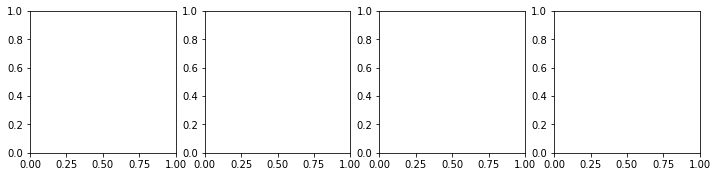

In [17]:
high_loss = losses[(2 < losses.loss) ]
os.makedirs("hl",exist_ok = True)

for n in tqdm.tqdm(range(len(high_loss))):

    row = high_loss.iloc[n]
    fig, ax = plt.subplots(4,4,figsize=(12,12))
    keys = row['local_path']
    for i,a in enumerate(ax.flatten()):
        try:
            a.imshow(plt.imread(keys[i]))
        except: pass
        a.axis('off')
    plt.suptitle(f"{row['view_direction']} {row['loss'] :.2f}")
    path = "hl/" + "!".join([str(u) for u in high_loss.index[n]]) + ".jpg"
    plt.savefig(path)
    plt.close()


In [43]:
l = {i for c in losses.index for i in c[1]}
"%" in l

False

In [46]:
"!" in l


False

399

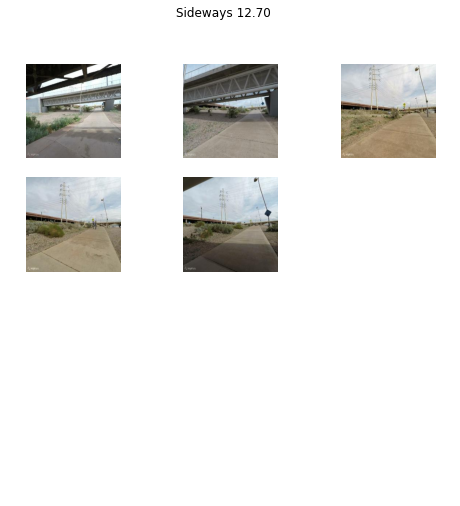

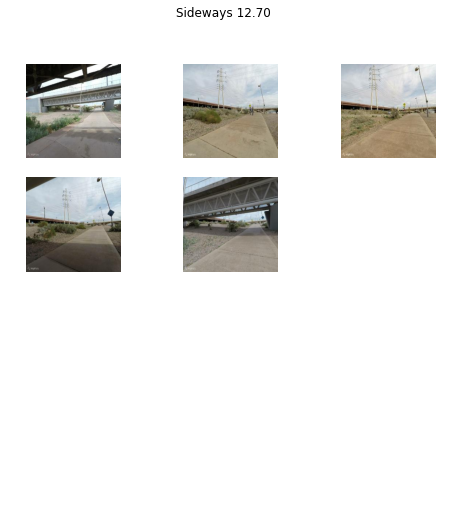

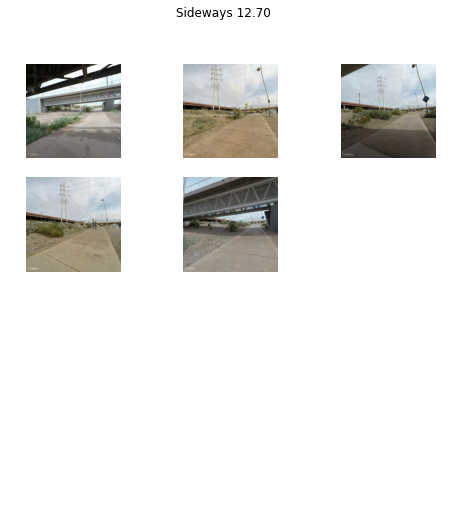

In [39]:
for i in range(3):
    plot_row(losses.iloc[0])

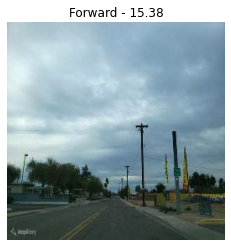

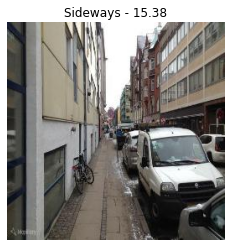

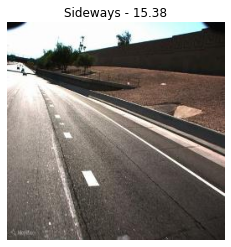

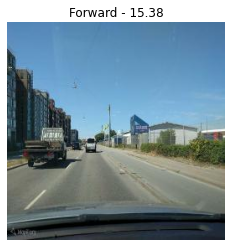

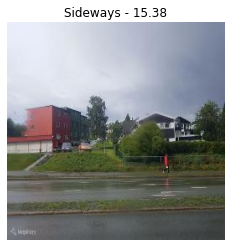

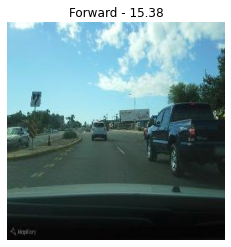

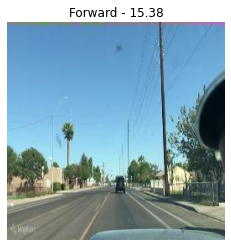

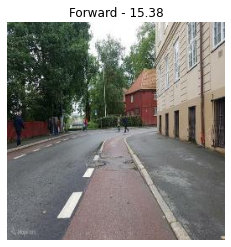

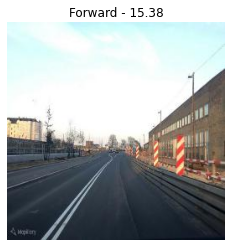

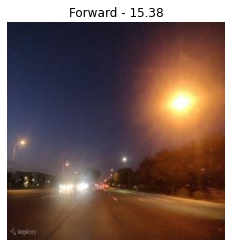

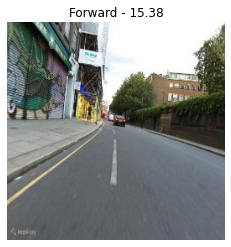

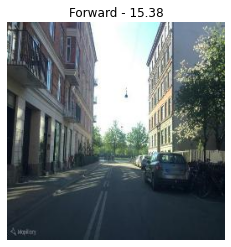

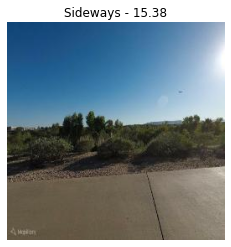

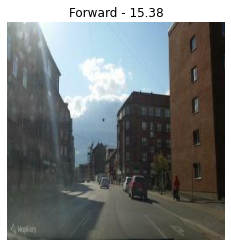

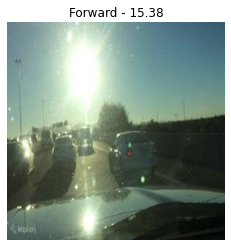

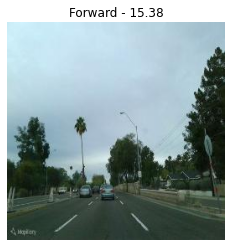

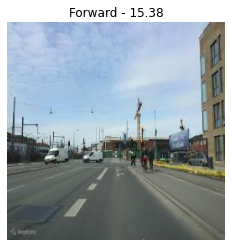

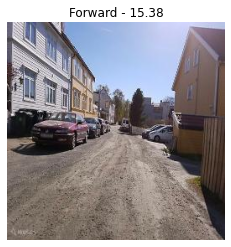

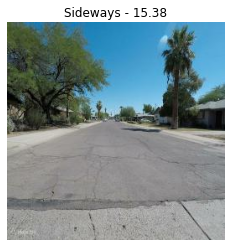

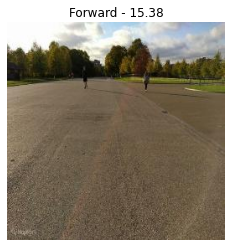

In [2]:
df.value_counts(["ds_type","view_direction"],normalize=True)

ds_type  view_direction
train    Forward           0.540185
         Sideways          0.252901
test     Forward           0.068313
val      Forward           0.065922
         Sideways          0.034754
test     Sideways          0.032240
train    Backward          0.003858
val      Backward          0.001796
test     Backward          0.000031
dtype: float64